In [2]:
!pwd

/root/Git Repo/SIADS_Capstone_Group17/Jupyter_Notebooks


In [2]:
# !pip install psycopg2

In [3]:
import psycopg2
import pandas as pd
import pytz

In [4]:
db_connection = psycopg2.connect(
            user='USER_STRING', password='PW_STRING', #Removed for Git
            host='mads-capstone.cmohac77hep9.eu-north-1.rds.amazonaws.com', port=5432,
            database="mads")

In [5]:
selected_columns = ["id", "subreddit_id", "subreddit", "author", "created_utc", "permalink", "title", "selftext", "num_comments", "score",]


select_query ="""
SELECT DATE(to_timestamp(created_utc)) as date, COUNT(*) as record_count
FROM submissions
GROUP BY DATE(to_timestamp(created_utc))
ORDER BY date;
"""

In [6]:
cursor = db_connection.cursor()
cursor.execute(select_query)
rows = cursor.fetchall()
# rows
df = pd.DataFrame(rows, columns=['date', 'record_count'])
# df = pd.DataFrame(rows)
# # df.columns = selected_columns
print(df.shape)
df.index = df.date
df = df.drop(columns=['date'])
display(df.head(20))

(3738, 2)


,record_count
date,
2012-04-11,1
2012-04-12,1
2012-04-16,1
2012-04-17,1
2012-04-19,2
2012-04-21,1
2012-04-23,1
2012-04-24,2
2012-04-25,6


<AxesSubplot:xlabel='date'>

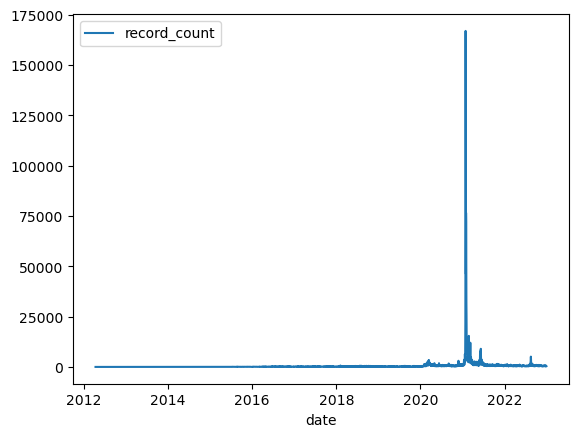

In [7]:
df.plot()

<AxesSubplot:xlabel='date'>

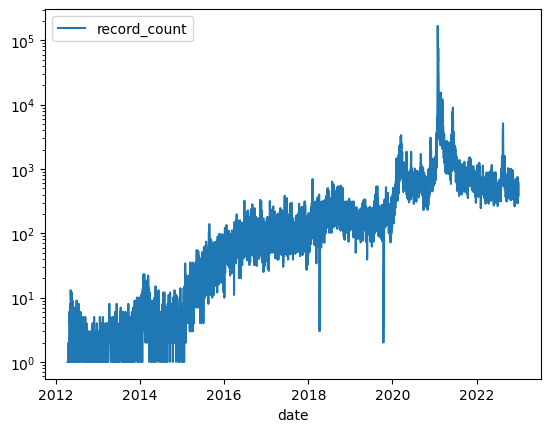

In [8]:
df.plot(logy=True)

In [18]:
import plotly.express as px
import numpy as np

fig = px.line(df, x=df.index, y='record_count', log_y=True)  # Use log_y=True for logarithmic y-axis
fig.update_layout(
    title="r/WallStreetBets Daily Post Count",
    title_x=0.5,
    xaxis_title="Date",  
    yaxis_title="Posts per Day",
    height=600,
    width=800,
    xaxis=dict(
        nticks=20,  # Adjust the number of x-axis ticks
    ),
    yaxis=dict(
        nticks=8,  # Adjust the number of y-axis ticks
    )
    
)

fig.add_vrect(
    x0="2020-12-15",  # Replace with your start date
    x1="2021-05-15",  # Replace with your end date
    fillcolor="Grey",  # You can change the color
    opacity=0.3,  # Adjust the opacity as needed
    line_width=0,
)

fig.add_annotation(
    x="2021-01-15",  # Position for the annotation (midpoint of the rectangle)
    y=np.log(max(df['record_count'])) / 3+1,  # Position on the y-axis (you can adjust this)
    text="Peak of GME Short Squeeze",  # Text of the annotation
    showarrow=True,  # Whether to show an arrow pointing to the annotation
    arrowhead=1,  # Style of the arrowhead
    ax=-120,  # Horizontal offset for the arrow
    ay=-20  # Vertical offset for the arrow
)

fig.show()

<AxesSubplot:xlabel='date'>

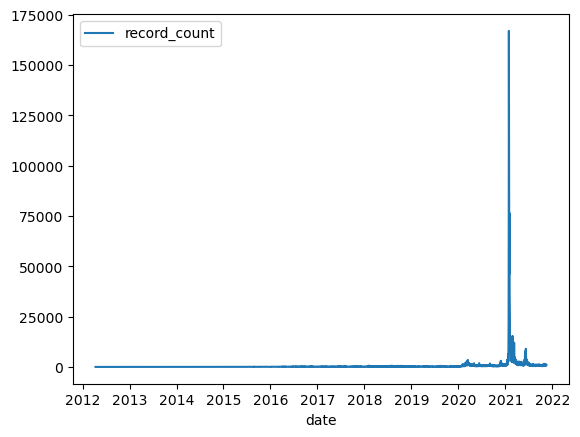

In [9]:
df[:-410].plot()

<AxesSubplot:xlabel='date'>

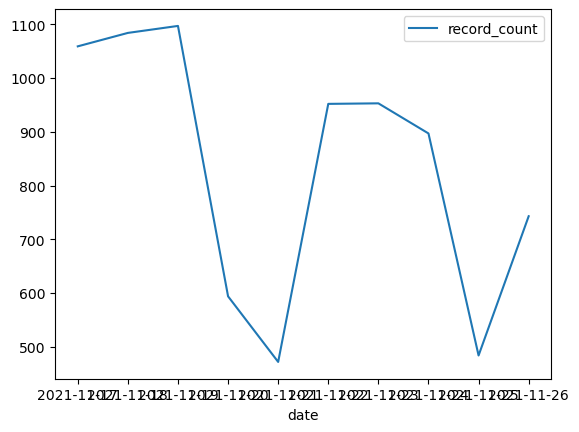

In [10]:
df[-410:-400].plot()

In [11]:
df[-410:-400].head(50)

,record_count
date,
2021-11-17,1059
2021-11-18,1084
2021-11-19,1097
2021-11-20,594
2021-11-21,472
2021-11-22,952
2021-11-23,953
2021-11-24,897
2021-11-25,484


<AxesSubplot:xlabel='date'>

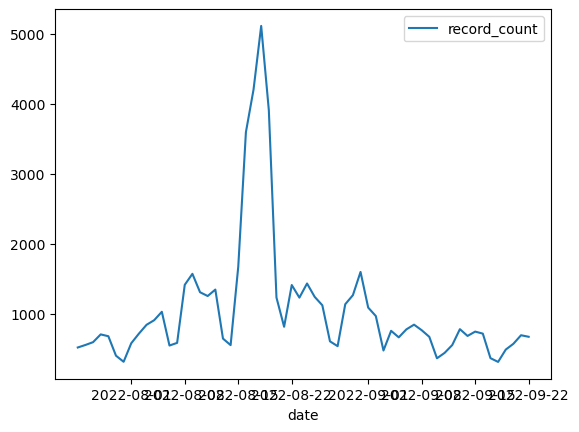

In [12]:
df[-160:-100].plot()

In [13]:
df[-160:-100].head(50)

,record_count
date,
2022-07-25,518
2022-07-26,554
2022-07-27,594
2022-07-28,705
2022-07-29,679
2022-07-30,401
2022-07-31,314
2022-08-01,579
2022-08-02,716


<AxesSubplot:xlabel='date'>

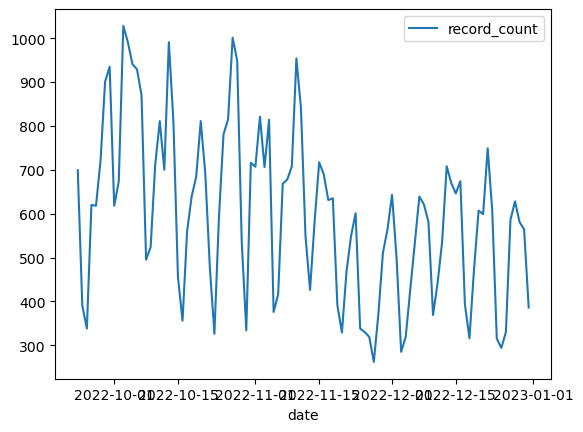

In [14]:
df[-100:].plot()

In [15]:
df[-100:].describe()

,record_count
count,100.000000
mean,600.080000
std,194.209336
min,262.000000
25%,438.250000
50%,607.000000
75%,708.000000
max,1028.000000


In [16]:
import datetime

timestamp = 1334162440
date_time = datetime.datetime.utcfromtimestamp(timestamp).date()
print(date_time)

2012-04-11


In [17]:

timestamp = 1672530717
date_time = datetime.datetime.utcfromtimestamp(timestamp).date()
print(date_time)

2022-12-31


In [18]:

timestamp = 1651362455
date_time = datetime.datetime.utcfromtimestamp(timestamp).date()
print(date_time)

2022-04-30


In [19]:

timestamp = 1643600000
date_time = datetime.datetime.utcfromtimestamp(timestamp).date()
print(date_time)

2022-01-31


In [22]:
import pandas as pd

output_file = 'wallstreetbets_submissions.json'
df = pd.read_json(output_file, lines=True)
df.head(10)

In [23]:
df.shape

(2218243, 133)

In [24]:
import datetime

In [54]:
df['time_diff'] = df['created_utc'].diff()
print("Large time gaps:")
gaps = df[df['time_diff'] > 3600*64]
gaps

Large time gaps:


,downs,link_flair_text,distinguished,media,url,link_flair_css_class,id,edited,num_reports,created_utc,...,retrieved_utc,top_awarded_type,url_overridden_by_dest,gallery_data,is_gallery,collections,call_to_action,live_audio,tournament_data,time_diff
2,2.0,None,None,None,http://www.reddit.com/r/wallstreetbets/comment...,None,sd5ai,1,NaN,1334615377,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,352326.0
7,3.0,None,None,None,http://i.imgur.com/RjZb8.png,None,sohin,0,NaN,1335204052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234379.0
25,1.0,None,None,None,http://www.reddit.com/r/wallstreetbets/comment...,None,t0cn8,0,NaN,1335819618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319689.0
232,2.0,None,None,None,http://www.reddit.com/r/wallstreetbets/comment...,None,uuvfc,0,NaN,1339353196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,236535.0
271,0.0,None,None,None,http://www.reddit.com/r/wallstreetbets/comment...,None,vjmmm,0,NaN,1340581047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256986.0
301,5.0,None,None,None,http://infinitemargin.com/qqq-breakout-trade,None,vxv9s,0,NaN,1341259706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239243.0
320,0.0,None,None,None,http://www.reddit.com/r/wallstreetbets/comment...,None,war6m,0,NaN,1341877475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,287692.0
364,6.0,None,None,None,http://www.reddit.com/r/wallstreetbets/comment...,None,x18dv,0,NaN,1343075057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,244716.0
376,4.0,None,None,None,http://www.reddit.com/r/wallstreetbets/comment...,None,xcys4,0,NaN,1343600218,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252955.0
424,2.0,None,None,None,http://www.reddit.com/r/wallstreetbets/comment...,None,y61yy,1344897441,NaN,1344895635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240024.0


In [57]:
gaps['date'] = pd.to_datetime(gaps.created_utc*1000000000).dt.date


/tmp/ipykernel_52/473305103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaps['date'] = pd.to_datetime(gaps.created_utc*1000000000).dt.date


In [56]:
possible_gaps = gaps[['id','date']]
possible_gaps

,id,date
2,sd5ai,2012-04-16
7,sohin,2012-04-23
25,t0cn8,2012-04-30
232,uuvfc,2012-06-10
271,vjmmm,2012-06-24
301,vxv9s,2012-07-02
320,war6m,2012-07-09
364,x18dv,2012-07-23
376,xcys4,2012-07-29
424,y61yy,2012-08-13
